In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import umap.plot

init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
subs = [1,2,3,4,6,7,8]
MAP_SUB = {sub:i for i, sub in enumerate(subs)}
sess = [1,2]
MAP_SES = {ses:i for i, ses in enumerate(sess)}
rois = ['v1','v2','v3','v1.v2','v1.v2.v3']
MAP_ROI = {roi:i for i, roi in enumerate(rois)}
delay = 4 # TR
fmriData = np.full([len(subs),len(sess),len(rois)], fill_value=np.nan , dtype=object)
for sub in tqdm(subs):
    for ses in sess:
        for roi in rois:
            SUB = str(sub)
            SES = str(ses)
            resultDir = '/media/hdd1/users/sharifi/capsnet/probe/'
            roiDir = '/media/hdd1/users/sharifi/fmri/sub0' + SUB + '/sess0' + SES + '/results.mni.noblur/'
            fmriData[MAP_SUB[sub],MAP_SES[ses],MAP_ROI[roi]] = np.genfromtxt(resultDir+'probe.all.sub0'+SUB+'.ses0'+SES +'.'+roi+'.txt', delimiter=',')
#             fmriData[MAP_SUB[sub],MAP_SES[ses],MAP_ROI[roi]] = np.loadtxt(roiDir+'roi.data.'+roi+'.sub0'+SUB+'.sess0'+SES+'.txt', delimiter=" ")

100%|██████████| 7/7 [00:16<00:00,  2.35s/it]


In [602]:
fmriData.shape

(7, 2, 5)

In [31]:
fmriData[0,0,0].shape

(128, 3384)

## UMAP Char On Voxel

In [628]:
UmapData = fmriData[:,:,MAP_ROI['v1']]
UmapData = np.hstack(UmapData)
UmapData = np.dstack(UmapData)
UmapData = UmapData.reshape((UmapData.shape[0], UmapData.shape[1], 2, 7))
UmapData = UmapData.reshape((8, 16 , UmapData.shape[1], 2, 7))
UmapData.shape

(8, 16, 3384, 2, 7)

In [629]:
UmapData = np.transpose(UmapData, (0, 1, 3, 4, 2))
UmapData.shape

(8, 16, 2, 7, 3384)

In [630]:
UmapData = np.reshape(UmapData, (UmapData.shape[0], UmapData.shape[1]*UmapData.shape[2]*UmapData.shape[3], UmapData.shape[4]))
UmapData.shape

(8, 224, 3384)

In [631]:
UmapData = np.reshape(UmapData, (UmapData.shape[0]*UmapData.shape[1], UmapData.shape[2]))
# UmapData = UmapData[:,np.random.permutation(UmapData.shape[1])[:100]]
UmapData.shape

(1792, 3384)

In [632]:
reducer = umap.UMAP()
UmapDataScaled = StandardScaler().fit_transform(UmapData)
UmapDataScaled.shape

(1792, 3384)

In [633]:
embedding = reducer.fit_transform(UmapDataScaled)
embedding.shape

(1792, 2)

In [634]:
Label = np.array([[i]*224 for i in range(8)]).reshape((-1,))

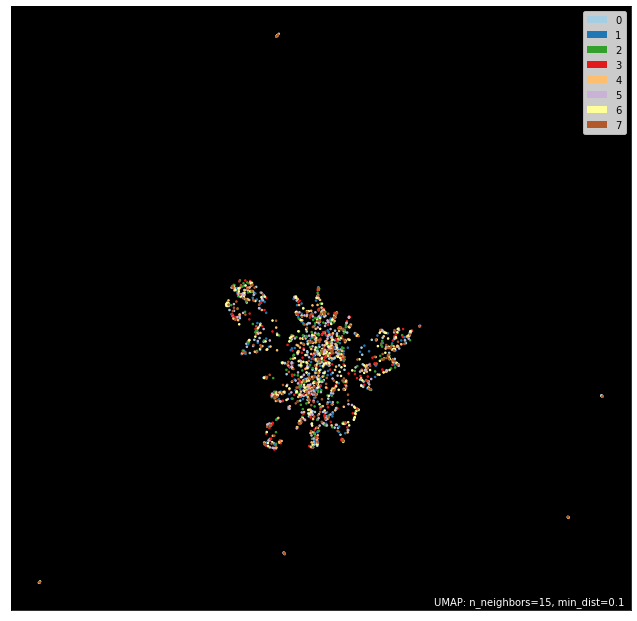

In [635]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')

## UMAP Char

In [416]:
UmapData = fmriData[:,:,MAP_ROI['v1']]
UmapData = np.hstack(UmapData)
UmapData = np.dstack(UmapData)
UmapData = UmapData.reshape((UmapData.shape[0], UmapData.shape[1], 2, 7))
UmapData = UmapData.reshape((8, 16 , UmapData.shape[1], 2, 7))
UmapData.shape

(8, 16, 3384, 2, 7)

In [417]:
UmapData = np.transpose(UmapData, (0, 2, 1, 3, 4))
UmapData.shape

(8, 3384, 16, 2, 7)

In [418]:
UmapData = np.reshape(UmapData, (UmapData.shape[0]*UmapData.shape[1], UmapData.shape[2]*UmapData.shape[3]*UmapData.shape[4]))
UmapData.shape

(27072, 224)

In [419]:
reducer = umap.UMAP()
UmapDataScaled = StandardScaler().fit_transform(UmapData)
UmapDataScaled.shape

(27072, 224)

In [420]:
embedding = reducer.fit_transform(UmapDataScaled)
embedding.shape

(27072, 2)

In [421]:
Label = np.array([[i]*3384 for i in range(8)]).reshape((-1,))

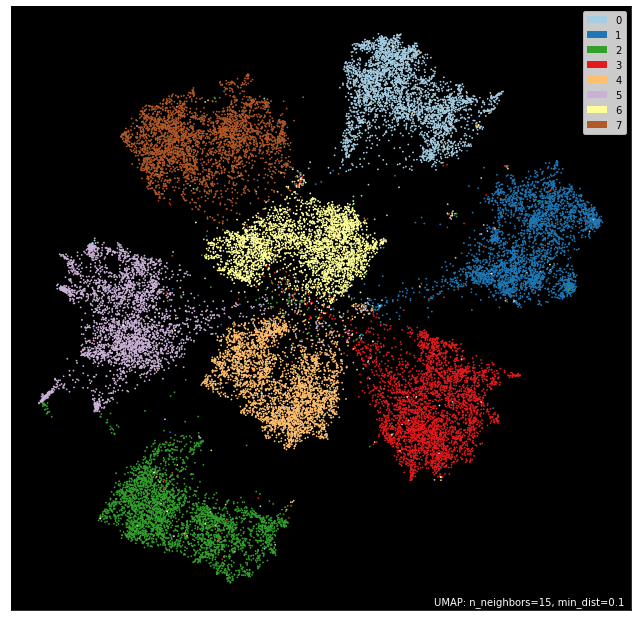

In [422]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')

## UMAP Char Per Session

In [383]:
UmapData = fmriData[:,MAP_SES[2],MAP_ROI['v1']]
UmapData = np.stack(UmapData)
UmapData = UmapData.reshape((UmapData.shape[0], 8, 16 , UmapData.shape[2]))
UmapData.shape

(7, 8, 16, 3384)

In [384]:
UmapData = np.transpose(UmapData, (1, 3, 0, 2))
UmapData.shape

(8, 3384, 7, 16)

In [385]:
UmapData = np.reshape(UmapData, (UmapData.shape[0]*UmapData.shape[1], UmapData.shape[2]*UmapData.shape[3]))
UmapData.shape

(27072, 112)

In [386]:
reducer = umap.UMAP()
UmapDataScaled = StandardScaler().fit_transform(UmapData)
UmapDataScaled.shape

(27072, 112)

In [387]:
embedding = reducer.fit_transform(UmapDataScaled)
embedding.shape

(27072, 2)

In [388]:
Label = np.array([[i]*3384 for i in range(8)]).reshape((-1,))

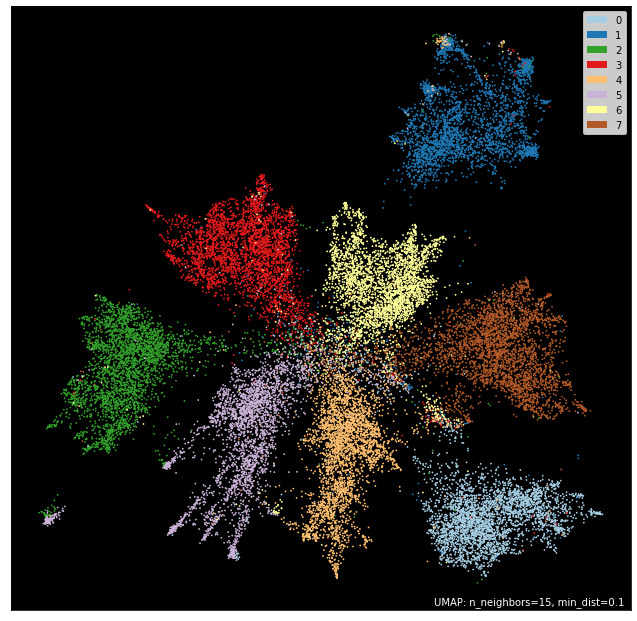

In [389]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')

## UMAP Char Per Sub

In [347]:
UmapData = fmriData[MAP_SUB[7],MAP_SES[2],MAP_ROI['v1']]
UmapData = UmapData.reshape((8, 16 , UmapData.shape[1]))
UmapData.shape

(8, 16, 3384)

In [348]:
UmapData = np.transpose(UmapData, (0, 2, 1))
UmapData.shape

(8, 3384, 16)

In [349]:
UmapData = np.reshape(UmapData, (UmapData.shape[0]*UmapData.shape[1], UmapData.shape[2]))
UmapData.shape

(27072, 16)

In [350]:
reducer = umap.UMAP()
UmapDataScaled = StandardScaler().fit_transform(UmapData)
UmapDataScaled.shape

(27072, 16)

In [351]:
embedding = reducer.fit_transform(UmapDataScaled)
embedding.shape

(27072, 2)

In [352]:
Label = np.array([[i]*3384 for i in range(8)]).reshape((-1,))

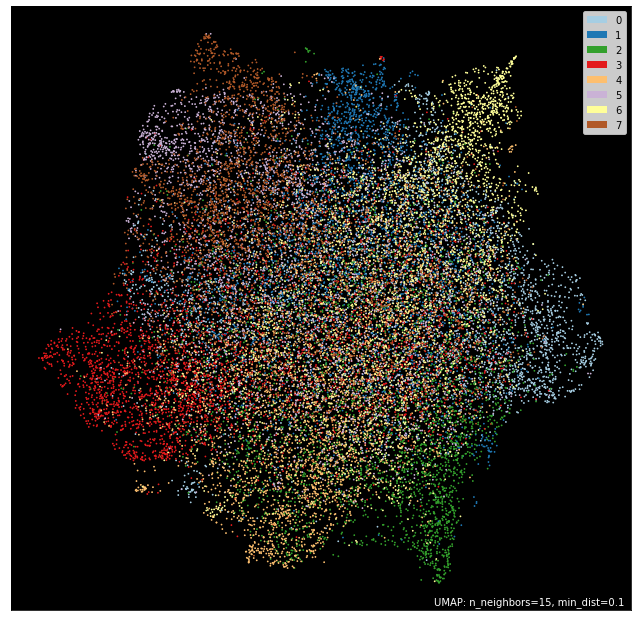

In [353]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')

## UMAP Char & Instance

In [692]:
CharIndex = 0

In [693]:
UmapData = fmriData[:,:,MAP_ROI['v1']]
UmapData = np.hstack(UmapData)
UmapData = np.dstack(UmapData)
UmapData = UmapData.reshape((UmapData.shape[0], UmapData.shape[1], 2, 7))
UmapData = UmapData.reshape((8, 16 , UmapData.shape[1], 2, 7))
UmapData.shape

(8, 16, 3384, 2, 7)

In [694]:
UmapData = UmapData[CharIndex,:,:,:,:]
UmapData.shape

(16, 3384, 2, 7)

In [695]:
UmapData = np.transpose(UmapData, (0, 2, 3, 1))
UmapData.shape

(16, 2, 7, 3384)

In [696]:
UmapData = np.reshape(UmapData, (UmapData.shape[0], UmapData.shape[1]*UmapData.shape[2] ,UmapData.shape[3]))
UmapData.shape

(16, 14, 3384)

In [697]:
UmapData = np.reshape(UmapData, (UmapData.shape[0]*UmapData.shape[1], UmapData.shape[2]))
UmapData.shape

(224, 3384)

In [698]:
reducer = umap.UMAP()
UmapDataScaled = StandardScaler().fit_transform(UmapData)
UmapDataScaled.shape

(224, 3384)

In [699]:
embedding = reducer.fit_transform(UmapDataScaled)
embedding.shape

(224, 2)

In [700]:
Label = np.array([[i]*14 for i in range(16)]).reshape((-1,))

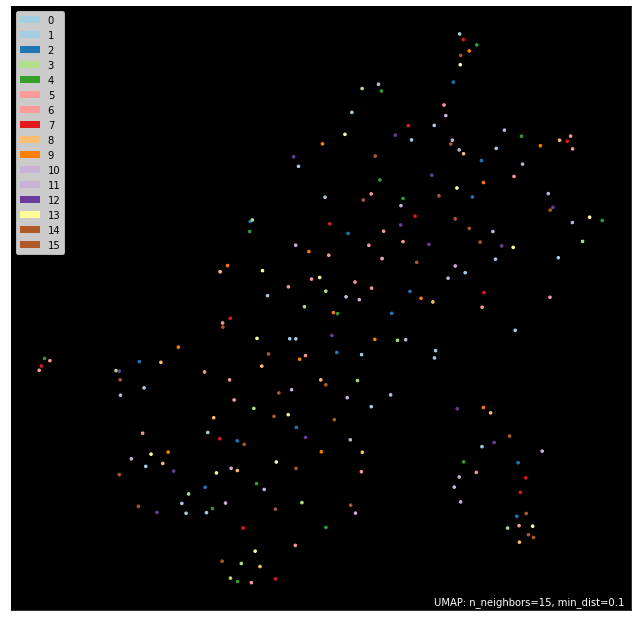

In [701]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')

## UMAP Value

In [497]:
SES = 1

In [498]:
UmapData = fmriData[:,:,MAP_ROI['v1']]
UmapData = np.hstack(UmapData)
UmapData = np.dstack(UmapData)
UmapData = UmapData.reshape((UmapData.shape[0], UmapData.shape[1], 2, 7))
UmapData = UmapData.reshape((8, 16 , UmapData.shape[1], 2, 7))
UmapData = UmapData[:,:,:,MAP_SES[SES],:]
UmapData.shape

(8, 16, 3384, 7)

In [499]:
UmapData2 = np.empty((8, 16, 3384, 8))
UmapData2[:,:,:,:-1] = UmapData
UmapData2[:,:,:,-1] = UmapData[:,:,:,-1]
UmapData2.shape

(8, 16, 3384, 8)

In [513]:
UmapData3 = np.full((2, 16, 3384, 32), fill_value=np.nan)
temp1 = np.concatenate((UmapData2[:4,:,:,:4],UmapData2[4:,:,:,4:]))
temp1 = np.transpose(temp1, (1, 2, 3, 0))
temp1 = temp1.reshape((16,3384,32))
UmapData3[1,:,:,:] = temp1
temp0 = np.concatenate((UmapData2[:4,:,:,4:],UmapData2[4:,:,:,:4]))
temp0 = np.transpose(temp0, (1, 2, 3, 0))
temp0 = temp0.reshape((16,3384,32))
UmapData3[0,:,:,:] = temp0
UmapData3.shape

(2, 16, 3384, 32)

In [504]:
UmapData3 = np.transpose(UmapData3, (0, 2, 1, 3))
UmapData3.shape

(2, 3384, 16, 32)

In [505]:
UmapData3 = np.reshape(UmapData3, (UmapData3.shape[0]*UmapData3.shape[1], UmapData3.shape[2]*UmapData3.shape[3]))
UmapData3.shape

(6768, 512)

In [506]:
reducer = umap.UMAP()
UmapDataScaled = StandardScaler().fit_transform(UmapData3)
UmapDataScaled.shape

(6768, 512)

In [510]:
embedding = reducer.fit_transform(UmapDataScaled)
embedding.shape

(6768, 2)

In [511]:
Label = np.array([[i]*3384 for i in range(2)]).reshape((-1,))

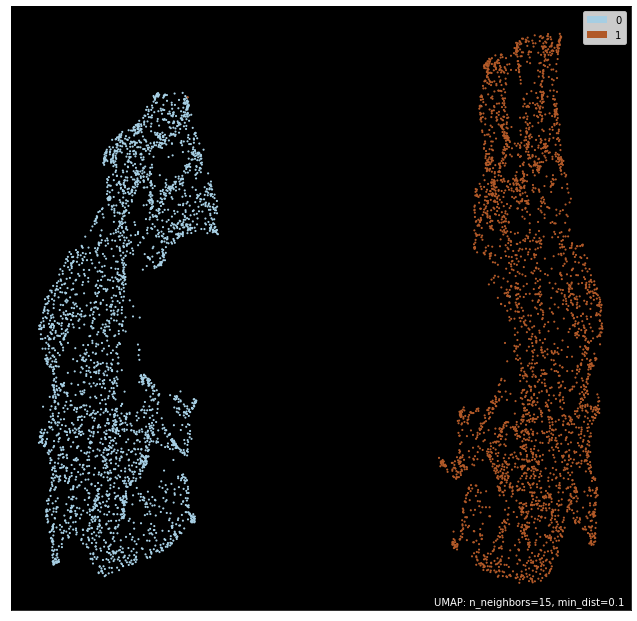

In [512]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')

## UMAP Value v2

In [676]:
SES = 1

In [677]:
UmapData = fmriData[:,:,MAP_ROI['v1']]
UmapData = np.hstack(UmapData)
UmapData = np.dstack(UmapData)
UmapData = UmapData.reshape((UmapData.shape[0], UmapData.shape[1], 2, 7))
UmapData = UmapData.reshape((8, 16 , UmapData.shape[1], 2, 7))
UmapData = UmapData[:,:,:,MAP_SES[SES],:]
UmapData.shape

(8, 16, 3384, 7)

In [678]:
UmapData2 = np.empty((8, 16, 3384, 8))
UmapData2[:,:,:,:-1] = UmapData
UmapData2[:,:,:,-1] = UmapData[:,:,:,-1]
UmapData2.shape

(8, 16, 3384, 8)

In [679]:
UmapData3 = np.full((2, 16, 3384, 32), fill_value=np.nan)
temp1 = np.concatenate((UmapData2[:4,:,:,:4],UmapData2[4:,:,:,4:]))
temp1 = np.transpose(temp1, (1, 2, 3, 0))
temp1 = temp1.reshape((16,3384,32))
UmapData3[1,:,:,:] = temp1
temp0 = np.concatenate((UmapData2[:4,:,:,4:],UmapData2[4:,:,:,:4]))
temp0 = np.transpose(temp0, (1, 2, 3, 0))
temp0 = temp0.reshape((16,3384,32))
UmapData3[0,:,:,:] = temp0
UmapData3.shape

(2, 16, 3384, 32)

In [680]:
UmapData3 = np.transpose(UmapData3, (0, 1, 3, 2))
UmapData3.shape

(2, 16, 32, 3384)

In [681]:
UmapData3 = np.reshape(UmapData3, (UmapData3.shape[0], UmapData3.shape[1]*UmapData3.shape[2], UmapData3.shape[3]))
UmapData3.shape

(2, 512, 3384)

In [682]:
UmapData3 = np.reshape(UmapData3, (UmapData3.shape[0]*UmapData3.shape[1], UmapData3.shape[2]))
UmapData3.shape

(1024, 3384)

In [683]:
reducer = umap.UMAP()
UmapDataScaled = StandardScaler().fit_transform(UmapData3)
UmapDataScaled.shape

(1024, 3384)

In [684]:
embedding = reducer.fit_transform(UmapDataScaled)
embedding.shape

(1024, 2)

In [685]:
Label = np.array([[i]*512 for i in range(2)]).reshape((-1,))

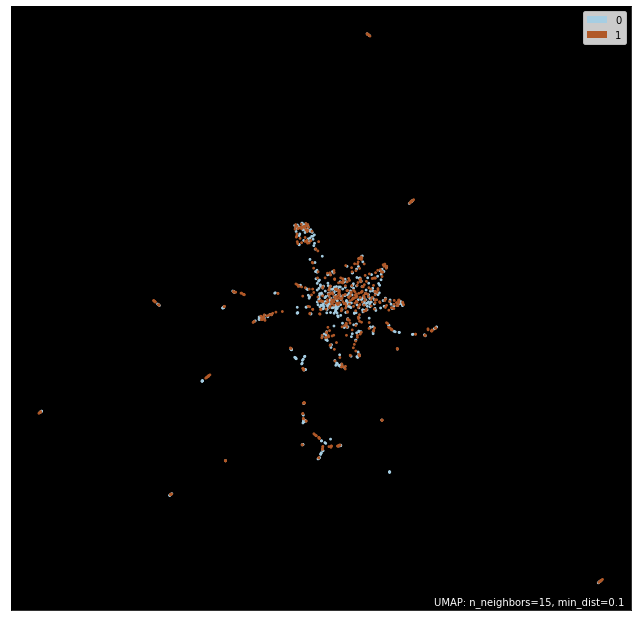

In [675]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')

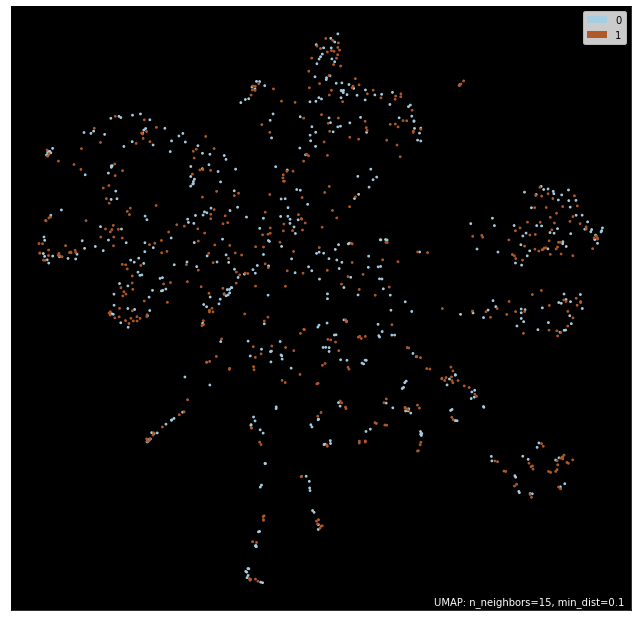

In [686]:
umap.plot.points(reducer, labels=Label, color_key_cmap='Paired', background='black')